In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import matplotlib
#matplotlib.use("agg")
%env MUJOCO_GL=egl

import numpy as np
import os
import matplotlib.pyplot as plt
from dm_control import suite
from dm_control.suite.wrappers import pixels
import dm_control.suite.swimmer as swimmer

import torch
if torch.cuda.is_available():
    print("Using GPU")
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
    os.environ["CUDA_VISIBLE_DEVICES"]="0"
else:
    print("Using CPU")


env: MUJOCO_GL=egl


ImportError: ('Unable to load EGL library', "dlopen(EGL, 0x000A): tried: 'EGL' (no such file), '/System/Volumes/Preboot/Cryptexes/OSEGL' (no such file), '/Users/reecekeller/miniforge3/envs/mujoco_env/lib/python3.10/lib-dynload/../../EGL' (no such file), '/Users/reecekeller/miniforge3/envs/mujoco_env/bin/../lib/EGL' (no such file), '/usr/lib/EGL' (no such file, not in dyld cache), 'EGL' (no such file), '/usr/local/lib/EGL' (no such file), '/usr/lib/EGL' (no such file, not in dyld cache)", 'EGL', None)

# 1. Getting a handle on DM Control

In [ ]:
from zfa.model_training.envs import DMSuiteEnv

In [ ]:
env = DMSuiteEnv(
            domain_name="swimmer",
            task_name="swimmer3",
            task_kwargs={"random": 1},
        )

In [ ]:
action_spec = env.action_space
time_step = env.reset()
action = np.random.uniform(action_spec.low,
                         action_spec.high,
                         size=action_spec.shape)
time_step = env.step(action)

In [ ]:
time_step

(OrderedDict([('joints', array([ 0.93082722, -2.08959895])),
              ('to_target', array([-0.42590932, -2.06682279])),
              ('body_velocities',
               array([-4.67075510e-03, -6.57298677e-04, -3.49036635e-01,  6.57968663e-05,
                      -1.06444027e-02,  1.40789169e-01, -7.69754850e-03, -7.78094204e-04,
                       4.07982333e-01]))]),
 0.006826880479712226,
 False,
 False,
 {})

# 1. Loading the different benchmarks

In [ ]:
for domain_name, task_name in suite.BENCHMARKING:
    print(domain_name, task_name)

acrobot swingup
acrobot swingup_sparse
ball_in_cup catch
cartpole balance
cartpole balance_sparse
cartpole swingup
cartpole swingup_sparse
cheetah run
finger spin
finger turn_easy
finger turn_hard
fish upright
fish swim
hopper stand
hopper hop
humanoid stand
humanoid walk
humanoid run
manipulator bring_ball
pendulum swingup
point_mass easy
reacher easy
reacher hard
swimmer swimmer6
swimmer swimmer15
walker stand
walker walk
walker run


# 2. Trying to visualize outputs

In [ ]:
model_string, assets = swimmer.get_model_and_assets(4)

In [ ]:
physics = swimmer.Physics.from_xml_string(model_string, assets=assets)

In [ ]:
env = suite.load("swimmer", "swimmer6")
env = pixels.Wrapper(env, pixels_only=False)

In [ ]:
import dm_control
from dm_control import suite
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Load the environment
env = suite.load(domain_name="swimmer", task_name="swimmer6")

# Define a random policy
def random_policy(time_step):
    return np.random.uniform(low=-1.0, high=1.0, size=env.action_spec().shape)

# Run the environment
time_step = env.reset()
frames = []
viewer = env.physics.render(camera_id=0)
while not time_step.last():
    action = random_policy(time_step)
    time_step = env.step(action)
    frame = viewer.read_pixels(width=256, height=256, depth=False)
    frames.append(frame)

# Display the frames as a video
fig, ax = plt.subplots()
im = ax.imshow(frames[0])
def update(i):
    im.set_data(frames[i])
    return [im]
ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=50, blit=True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'read_pixels'

In [ ]:
# simplest test
from dm_control import suite
from dm_control import viewer

# Load an environment from the Control Suite.
env = suite.load(domain_name="humanoid", task_name="stand")

# Launch the viewer application.
viewer.launch(env)

/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: Failed to open display localhost:78.0'
  warnings.warn(message, GLFWError)


RuntimeError: <function DoubleBufferedGlfwContext._platform_init at 0x2b97722b7550> may only be called if using GLFW for offscreen rendering, got `render.BACKEND='egl'`.

In [ ]:
from dm_control import suite
env = suite.load('swimmer', 'swimmer6')
pixels = env.physics.render()

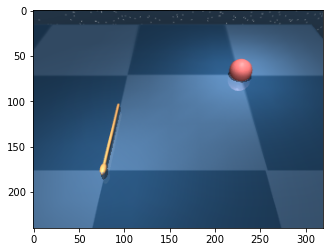

In [ ]:
plt.imshow(pixels)

# 3. Testing out a sample agent to get egocentric pixel inputs

In [ ]:
env = suite.load(domain_name="swimmer", task_name="swimmer6")

In [ ]:
env.action_spec()

BoundedArray(shape=(5,), dtype=dtype('float64'), name=None, minimum=[-1. -1. -1. -1. -1.], maximum=[1. 1. 1. 1. 1.])

In [ ]:
time_step = env.reset()

In [ ]:
from dm_control import suite
import numpy as np

# Load one task:
env = suite.load(domain_name="swimmer", task_name="swimmer6")
# also return pixels
env = pixels.Wrapper(env, pixels_only=False, render_kwargs={'camera_id': 2}) #egocentric

# Step through an episode and print out reward, discount and observation.
action_spec = env.action_spec()
time_step = env.reset()
while not time_step.last():
    action = np.random.uniform(action_spec.minimum,
                             action_spec.maximum,
                             size=action_spec.shape)
    time_step = env.step(action)
    #print(time_step.reward, time_step.discount, time_step.observation)

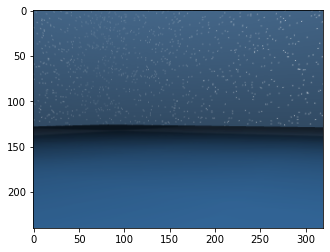

In [ ]:
plt.imshow(time_step.observation['pixels'])

In [ ]:
observation_spec.keys()

odict_keys(['joints', 'to_target', 'body_velocities'])

In [ ]:
observation_spec.keys()

odict_keys(['joints', 'to_target', 'body_velocities'])

In [ ]:
time_step.observation.keys()

odict_keys(['joints', 'to_target', 'body_velocities', 'pixels'])

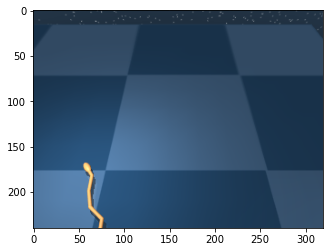

In [ ]:
plt.imshow(time_step.observation['pixels'])

In [ ]:
time_step.observation['joints']

array([ 0.71038403,  0.00730375, -0.47518642, -0.33975507,  0.99082523])

In [ ]:
time_step.observation['body_velocities']

array([ 5.22295281e-04, -3.18658157e-02,  9.43667638e-01, -5.74422736e-03,
        6.27101762e-03, -1.00821145e+00,  1.17758211e-02,  5.94462153e-03,
        6.58702686e-01, -8.30400793e-03, -4.39447341e-03, -2.64614009e-01,
        1.86842770e-02, -2.50141843e-03, -2.51494538e-01, -1.68542154e-02,
       -2.75182611e-02,  6.37835186e-01])

In [ ]:
action_spec.minimum

array([-1., -1., -1., -1., -1.])

In [ ]:
observation_spec = env.observation_spec()

In [ ]:
observation_spec

OrderedDict([('joints',
              Array(shape=(5,), dtype=dtype('float64'), name='joints')),
             ('to_target',
              Array(shape=(2,), dtype=dtype('float64'), name='to_target')),
             ('body_velocities',
              Array(shape=(18,), dtype=dtype('float64'), name='body_velocities'))])

# 4. Running DDPG with Stable Baselines

In [ ]:
from dm_control import suite
from dm_control.suite.wrappers import pixels

from stable_baselines3 import DDPG
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.vec_env import VecEnvWrapper, DummyVecEnv

import gym

# # Define a wrapper class for the dm_control environment
# class DmControlWrapper(gym.Env):
#     def __init__(self, env):
#         self.env = env
#         self.observation_space = gym.spaces.Box(low=0, high=255, shape=(240, 320, 3), dtype=np.uint8)
#         self.action_space = env.action_spec()

#     def reset(self):
#         obs = self.env.reset()
#         return np.array(obs['pixels'].generate_value())

#     def step(self, action):
#         obs, reward, done, info = self.env.step(action)
#         return np.array(obs['pixels'].generate_value()), reward, done, info

# # Define a function to create the environment
# def make_env():
#     env = suite.load(domain_name="swimmer", task_name="swimmer6")
#     env = pixels.Wrapper(env, pixels_only=False)
#     env = DmControlWrapper(env)
#     return env

# # Create a vectorized environment
# env = DummyVecEnv([make_env])
env = gym.make('dm2gym:Swimmer-v4')

# Define the DDPG model
model = DDPG("MlpPolicy", env, verbose=1)

# Train the model for 10000 steps
model.learn(total_timesteps=10000)

# Save the trained model
model.save("ddpg_swimmer")

# Evaluate the trained model
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    

/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
2023-07-07 17:35:09.673558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 17:35:11.577485: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: 

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 9.91     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 121      |
|    time_elapsed    | 33       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -14.8    |
|    critic_loss     | 0.0138   |
|    learning_rate   | 0.001    |
|    n_updates       | 3000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 4.97     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 104      |
|    time_elapsed    | 76       |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | -129     |
|    critic_loss     | 2.46     |
|    learning_rate   | 0.001    |
|    n_updates       | 7000     |
--------------

/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/stable_baselines3/common/policies.py:260: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  observation = np.array(observation)


ValueError: Error: Unexpected observation shape (2,) for Box environment, please use (8,) or (n_env, 8) for the observation shape.

# 5. Running DDPG with Tonic

In [ ]:
import os
from zfa.tonic.torch import models, agents, normalizers
from zfa.tonic.torch.agents import DDPG
import zfa.tonic as tonic
import zfa.tonic.torch
import torch.nn as nn

In [ ]:
def ddpg_mlp_model(
  actor_sizes=(300, 200),
  actor_activation=nn.ReLU,
  critic_sizes=(400, 300),
  critic_activation=nn.ReLU,
):
    return models.ActorCriticWithTargets(
    actor=models.Actor(
      encoder=models.ObservationEncoder(),
      torso=models.MLP(actor_sizes, actor_activation),
      head=models.DeterministicPolicyHead()
    ),
    critic=models.Critic(
      encoder=models.ObservationActionEncoder(),
      torso=models.MLP(critic_sizes, critic_activation),
      head=models.ValueHead(),
    ),
    observation_normalizer=normalizers.MeanStd(),
    )

In [ ]:
parallel = 1
sequential = 1
seed = 1

args = dict(locals())

# Build the train and test environments.
_environment = tonic.environments.ControlSuite(name="swimmer-swimmer6")
environment = tonic.environments.distribute(lambda: _environment, parallel, sequential)
environment.initialize(seed=seed)

test_environment = tonic.environments.distribute(lambda: _environment)
test_environment.initialize(seed=seed + 10000)

# Choose a name for the experiment.
if hasattr(test_environment, 'name'):
    environment_name = test_environment.name
else:
    environment_name = test_environment.__class__.__name__

agent = DDPG(model=ddpg_mlp_model())
agent.initialize(
        observation_space=environment.observation_space,
        action_space=environment.action_space, seed=seed)


if hasattr(agent, 'name'):
    name = agent.name
else:
    name = agent.__class__.__name__
if parallel != 1 or sequential != 1:
    name += f'-{parallel}x{sequential}'
    
# Initialize the logger to save data to the path environment/name/seed.
path = os.path.join('tonic', 'data', 'local', 'experiments', environment_name, name)
# tonic.logger.initialize(path, script_path=__file__, config=args)
tonic.logger.initialize(path, script_path=None, config=args)

# Build the trainer.
trainer = tonic.Trainer()
trainer.initialize(
agent=agent,
environment=environment,
test_environment=test_environment,
seed=seed,
)

# Train.
trainer.run()


TypeError: cannot pickle 'traceback' object

# 2. Understanding Swimmer observations

In [ ]:
from dm_control.suite.swimmer import get_model_and_assets, Physics, Swimmer

n_joints = 4
model_string, assets = get_model_and_assets(n_joints)
physics = Physics.from_xml_string(model_string, assets=assets)
task = Swimmer(random=0)

In [ ]:
physics.joints()

array([0., 0., 0.])

In [ ]:
physics.body_velocities()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
s = Swimmer()
s.get_observation(physics)

OrderedDict([('joints', array([0., 0., 0.])),
             ('to_target', array([1.  , 1.06])),
             ('body_velocities',
              array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))])

In [ ]:
physics.nose_to_target_dist()

1.4572576985557497

In [ ]:
physics.named.data.xmat['head']

array([1., 0., 0., 0., 1., 0., 0., 0., 1.])

In [ ]:
physics.named.data.xmat['head'].reshape(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
nose_to_target = (physics.named.data.geom_xpos['target'] -
                  physics.named.data.geom_xpos['nose'])
head_orientation = physics.named.data.xmat['head'].reshape(3, 3)

In [ ]:
nose_to_target

array([1.  , 1.06, 0.  ])

In [ ]:
head_orientation

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
nose_to_target.dot(head_orientation)

array([1.  , 1.06, 0.  ])

In [ ]:
head_orientation.T.dot(nose_to_target)

array([1.  , 1.06, 0.  ])

In [ ]:
headR_rand = np.random.rand(*head_orientation.shape)
a = nose_to_target.dot(headR_rand)
b = headR_rand.T.dot(nose_to_target)
np.array_equal(a,b)

True